In [4]:
!pip install pytrends
import matplotlib.pyplot as plt 
import numpy as np
from pytrends.request import TrendReq
import pandas as pd 
from pytrends.request import TrendReq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=bc7a4d655423db5137ab16e3be77d1946d51f0cd7f719004acddc15618843940
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [5]:
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing


In [2]:
# キーワードの設定　5キーワード以上は内部エラーになる
kw_list = ['kurashiki']

In [3]:
#アメリカ
pytrends = TrendReq(hl='en-US', tz=200)
pytrends.build_payload(kw_list=kw_list, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='US')


df1 = pytrends.interest_over_time().drop('isPartial',axis=1).rename(columns={'kurashiki': 'America'})

In [4]:
#イギリスGB
pytrends = TrendReq(hl='en-GB', tz=200)
pytrends.build_payload(kw_list=kw_list, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='GB')


df2 = pytrends.interest_over_time().drop('isPartial',axis=1).rename(columns={'kurashiki': 'UK'})

In [5]:
#カナダCA
pytrends = TrendReq(hl='en-CA', tz=200)
pytrends.build_payload(kw_list=kw_list, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='CA')


df3 = pytrends.interest_over_time().drop('isPartial',axis=1).rename(columns={'kurashiki': 'Canada'})

In [6]:
#オーストラリアAU
pytrends = TrendReq(hl='en-AU', tz=200)
pytrends.build_payload(kw_list=kw_list, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='AU')


df4 = pytrends.interest_over_time().drop('isPartial',axis=1).rename(columns={'kurashiki': 'Australia'})


In [10]:
#ニュージーランドNZ
pytrends = TrendReq(hl='en-NZ', tz=200)
pytrends.build_payload(kw_list=kw_list, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='NZ')


df5 = pytrends.interest_over_time().drop('isPartial',axis=1).rename(columns={'kurashiki': 'New Zealand'})

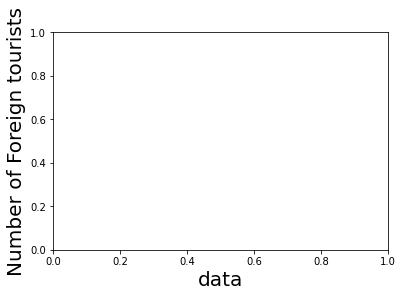

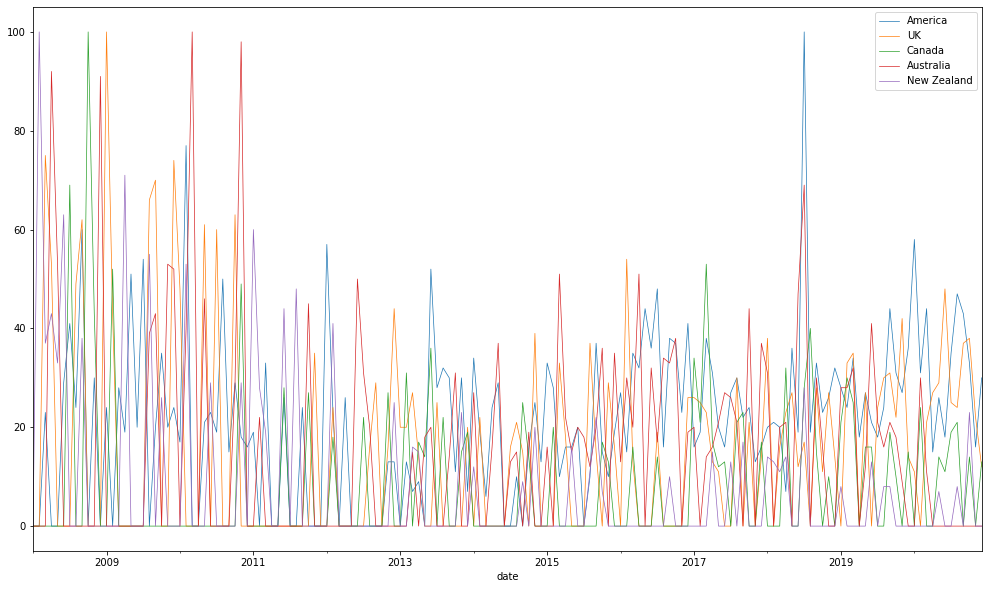

In [25]:
#結合
df = pd.concat([df1, df2,df3,df4,df5], axis=1)


df.plot(figsize=(17, 10), lw=.7)
plt.savefig("kensaku_suii")

In [12]:
print(df.resample("Y").sum())

            America   UK  Canada  Australia  New Zealand
date                                                    
2008-12-31      207  239     212        236          314
2009-12-31      295  353      52        187          152
2010-12-31      285  232      49        313          111
2011-12-31      102   35      55         67          199
2012-12-31      132  129      67        101           66
2013-12-31      219  126     154         98           54
2014-12-31      176  113      39        127           41
2015-12-31      214  148      50        245           56
2016-12-31      392  112      30        287           10
2017-12-31      272  163     211        226           45
2018-12-31      356  213     125        234           80
2019-12-31      332  258     152        226           37
2020-12-31      396  294     116         41           38


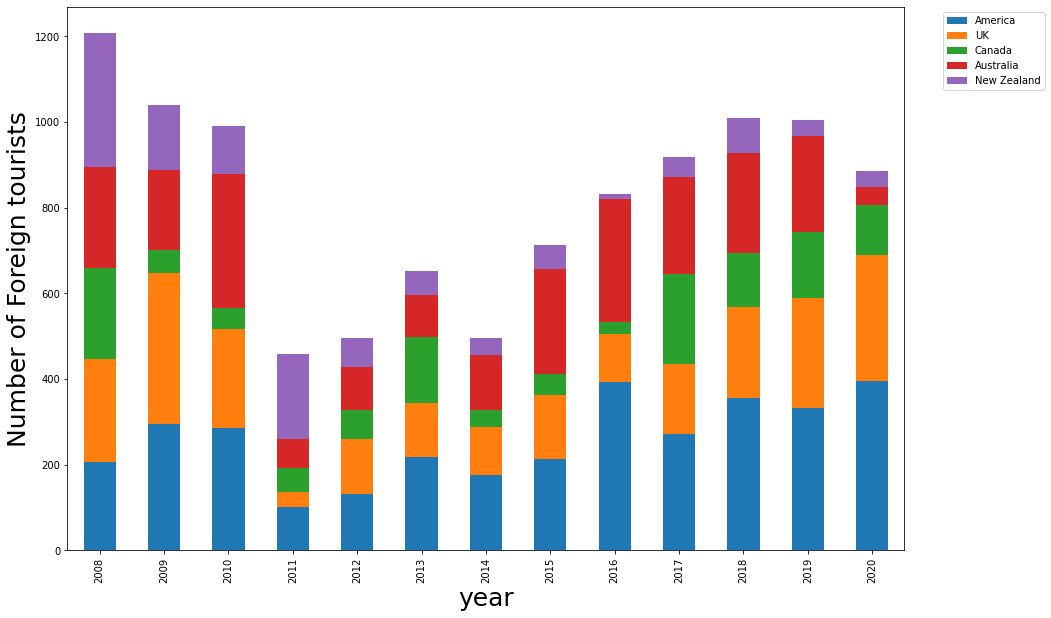

In [26]:
year=['2008','2009','2010','2011','2012','2013','2014', '2015', '2016', '2017', '2018','2019','2020']
yearly = df.resample('Y').sum().plot.bar(stacked=True, figsize=(15, 10))
plt.xticks(np.arange(13), year)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")





plt.xlabel("year", fontsize=25)
plt.ylabel("Number of Foreign tourists", fontsize=25)


plt.savefig("bou")
plt.show()


In [8]:
# キーワードの設定　5キーワード以上は内部エラーになる
kw_list2 = ['kurashiki hotel']
kw_list3 = ['kurashiki stay']

In [43]:
#アメリカ
pytrends = TrendReq(hl='en-US', tz=200)
pytrends.build_payload(kw_list=kw_list2, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='US')


df1 = pytrends.interest_over_time().drop('isPartial',axis=1).rename(columns={'kurashiki hotel': 'America'})
print(df1.resample("Y").sum())

            America
date               
2008-12-31      262
2009-12-31      169
2010-12-31       95
2011-12-31      113
2012-12-31       39
2013-12-31       44
2014-12-31       43
2015-12-31       24
2016-12-31       18
2017-12-31       49
2018-12-31       30
2019-12-31       71
2020-12-31      137


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
model = LinearRegression()
data= pd.read_csv('/content/drive/My Drive/kurashiki_data.csv', sep=",")

<class 'seaborn.axisgrid.PairGrid'>


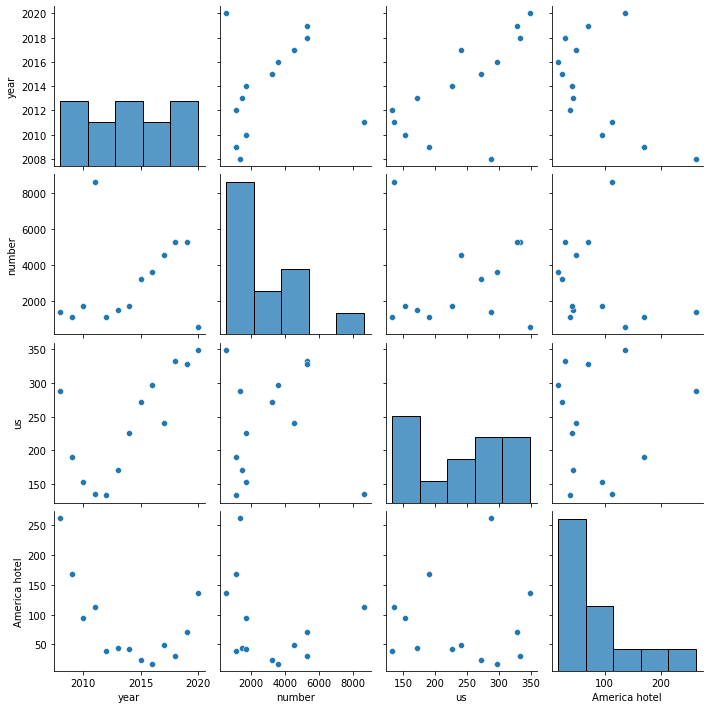

In [11]:
pg = sns.pairplot(data)
print(type(pg))

In [12]:
data.describe #データののぞき見

<bound method NDFrame.describe of     year    number   us  America hotel
0   2008  1380.966  288            262
1   2009  1127.253  190            169
2   2010  1716.582  152             95
3   2011  8644.363  135            113
4   2012  1139.052  133             39
5   2013  1481.982  171             44
6   2014  1740.111  226             43
7   2015  3239.412  272             24
8   2016  3618.153  297             18
9   2017  4558.968  241             49
10  2018  5318.037  333             30
11  2019  5280.846  328             71
12  2020   563.350  349            137>

In [16]:
x1 = data[["us","America hotel"]] 
y = data[["number"]] 

xx=data[["us"]]
xy=data[["America hotel"]]

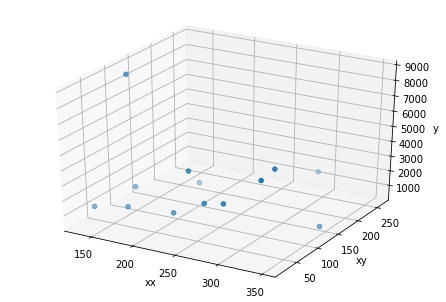

In [19]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter3D(xx, xy, y)
ax.set_xlabel("xx")
ax.set_ylabel("xy")
ax.set_zlabel("y")

#一旦，図示
plt.show()

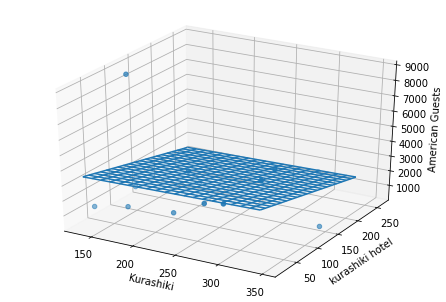

偏回帰係数
[[ 0.99800982 -8.26238284]]

切片
[3518.40932556]

決定係数
0.06253016349366625


In [20]:
model_lr = LinearRegression()
model_lr.fit(x1, y)

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(xx, xy, y)
ax.set_xlabel("Kurashiki")
ax.set_ylabel("kurashiki hotel")
ax.set_zlabel("American Guests")

#minmaxスケーリング
mesh_x1 = np.arange(xx.min()[0], xx.max()[0], (xx.max()[0]-xx.min()[0])/20)
mesh_x2 = np.arange(xy.min()[0], xy.max()[0], (xy.max()[0]-xy.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model_lr.coef_[0][0] * mesh_x1 + model_lr.coef_[0][1] * mesh_x2 + model_lr.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.savefig("kaiki")
plt.show()

print("偏回帰係数")
print(model_lr.coef_)
print("\n切片")
print(model_lr.intercept_)
print("\n決定係数")
print(model_lr.score(x1, y))

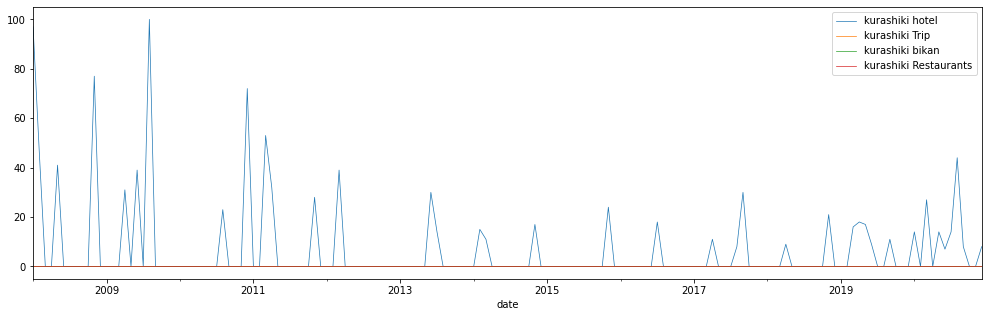

In [23]:
pytrends = TrendReq(hl='en-US', tz=200)
# キーワードの設定　5キーワード以上は内部エラーになる
kw_list3 = ['kurashiki hotel','kurashiki Trip',"kurashiki bikan","kurashiki Restaurants"]



# googleにリクエストする。
pytrends.build_payload(kw_list=kw_list3, 
                       timeframe='2008-01-01 2020-12-31',
                       geo='US')


df1 = pytrends.interest_over_time().drop('isPartial',axis=1)
df1.plot(figsize=(17, 5), lw=.7)
plt.savefig("kensaku2")

In [27]:
kw_list4 = ['japan hotel']

pytrends.build_payload(kw_list=kw_list4,timeframe='2008-01-01 2008-12-31',geo='US')
df = pytrends.interest_over_time().drop('isPartial',axis=1)
topics = pytrends.related_topics()
topics[kw_list4[0]]['top']

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/03pty&date=2008-01-01+200...,/m/03pty,Hotel,Building function
1,95,95,True,/trends/explore?q=/m/03_3d&date=2008-01-01+200...,/m/03_3d,Japan,Country in East Asia
2,20,20,True,/trends/explore?q=/m/07dfk&date=2008-01-01+200...,/m/07dfk,Tokyo,Capital of Japan
3,16,16,True,/trends/explore?q=/g/11b6gnvfr8&date=2008-01-0...,/g/11b6gnvfr8,Tokyo,Town in Japan
4,8,8,True,/trends/explore?q=/m/09d4_&date=2008-01-01+200...,/m/09d4_,Kyoto,City in Japan
5,6,6,True,/trends/explore?q=/m/014dsx&date=2008-01-01+20...,/m/014dsx,Travel,Topic
6,6,6,True,/trends/explore?q=/m/03_9r&date=2008-01-01+200...,/m/03_9r,Japanese Language,Spoken language
7,5,5,True,/trends/explore?q=/m/019kn7&date=2008-01-01+20...,/m/019kn7,Japanese people,Ethnic group
8,4,4,True,/trends/explore?q=/m/09cjl&date=2008-01-01+200...,/m/09cjl,Airport,Topic
9,4,4,True,/trends/explore?q=/m/0dqyw&date=2008-01-01+200...,/m/0dqyw,Osaka,City in Japan
